In [1]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,classification_report)

df=pd.read_csv('pima-indians-diabetes.csv')


In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
df.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   BloodPressure               768 non-null    int64  
 3   SkinThickness               768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   DiabetesPedigreeFunction    768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.nunique()

Pregnancies                    17
Glucose                       136
BloodPressure                  47
SkinThickness                  51
Insulin                       186
BMI                           248
DiabetesPedigreeFunction      517
Age                            52
Outcome                         2
dtype: int64

In [7]:
X = df.drop(columns=['Outcome'])  # 'Outcome' is the target column
y = df['Outcome']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [9]:
model = DecisionTreeClassifier()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)


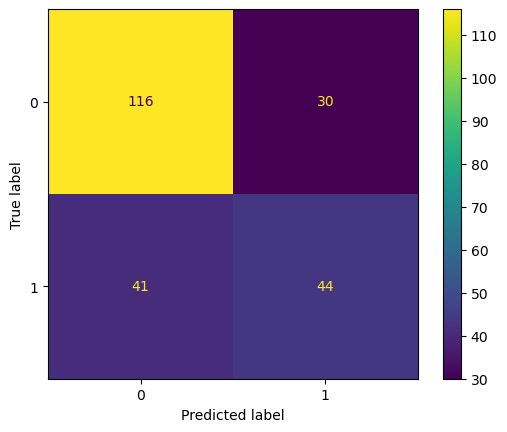

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


labels = ["0", "1"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=labels )
disp.plot()

In [11]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
print("F1_Score:",metrics.f1_score(y_test,y_pred))
print("\nClassification Report:\n",metrics.classification_report(y_test,y_pred))


Accuracy: 0.6926406926406926
Precision: 0.5945945945945946
Recall: 0.5176470588235295
F1_Score: 0.5534591194968554

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.77       146
           1       0.59      0.52      0.55        85

    accuracy                           0.69       231
   macro avg       0.67      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



<Axes: >

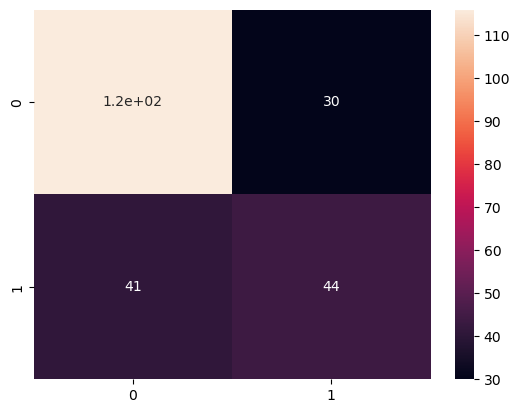

In [12]:
cm=confusion_matrix(y_test,y_pred)
import seaborn as sns
sns.heatmap(cm,annot=True)

In [13]:
%pip install pydotplus

from sklearn.tree import export_graphviz
from io import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  filled=True, rounded=True,special_characters=True,feature_names=feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

NameError: name 'feature_cols' is not defined

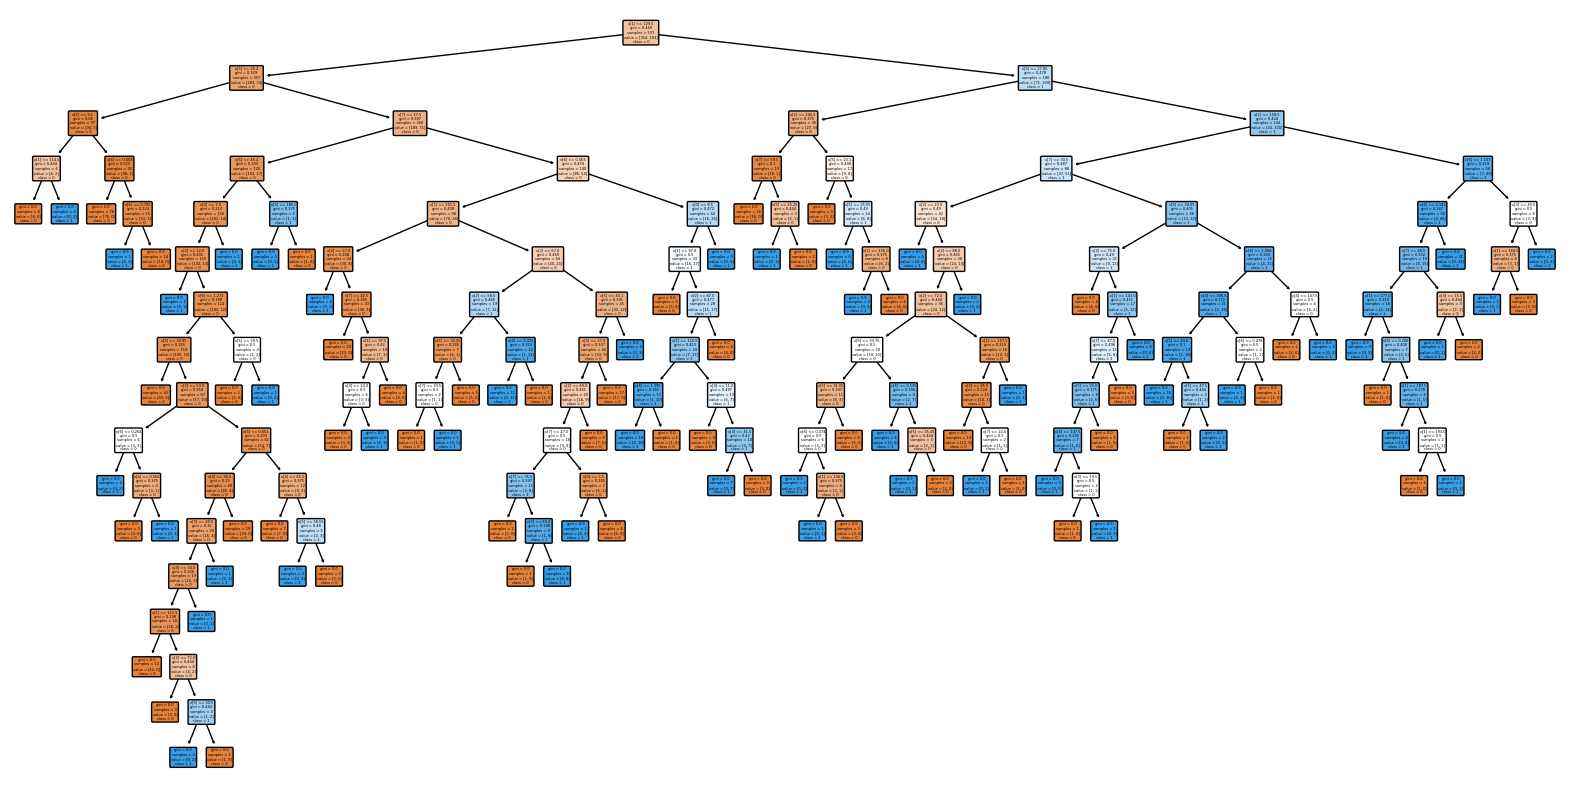

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model,  class_names=['0', '1'], filled=True, rounded=True)
plt.show()

In [ ]:
print("accuracy_score:",accuracy_score(y_test,y_pred))

accuracy_score: 0.6796536796536796


In [ ]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=3)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)


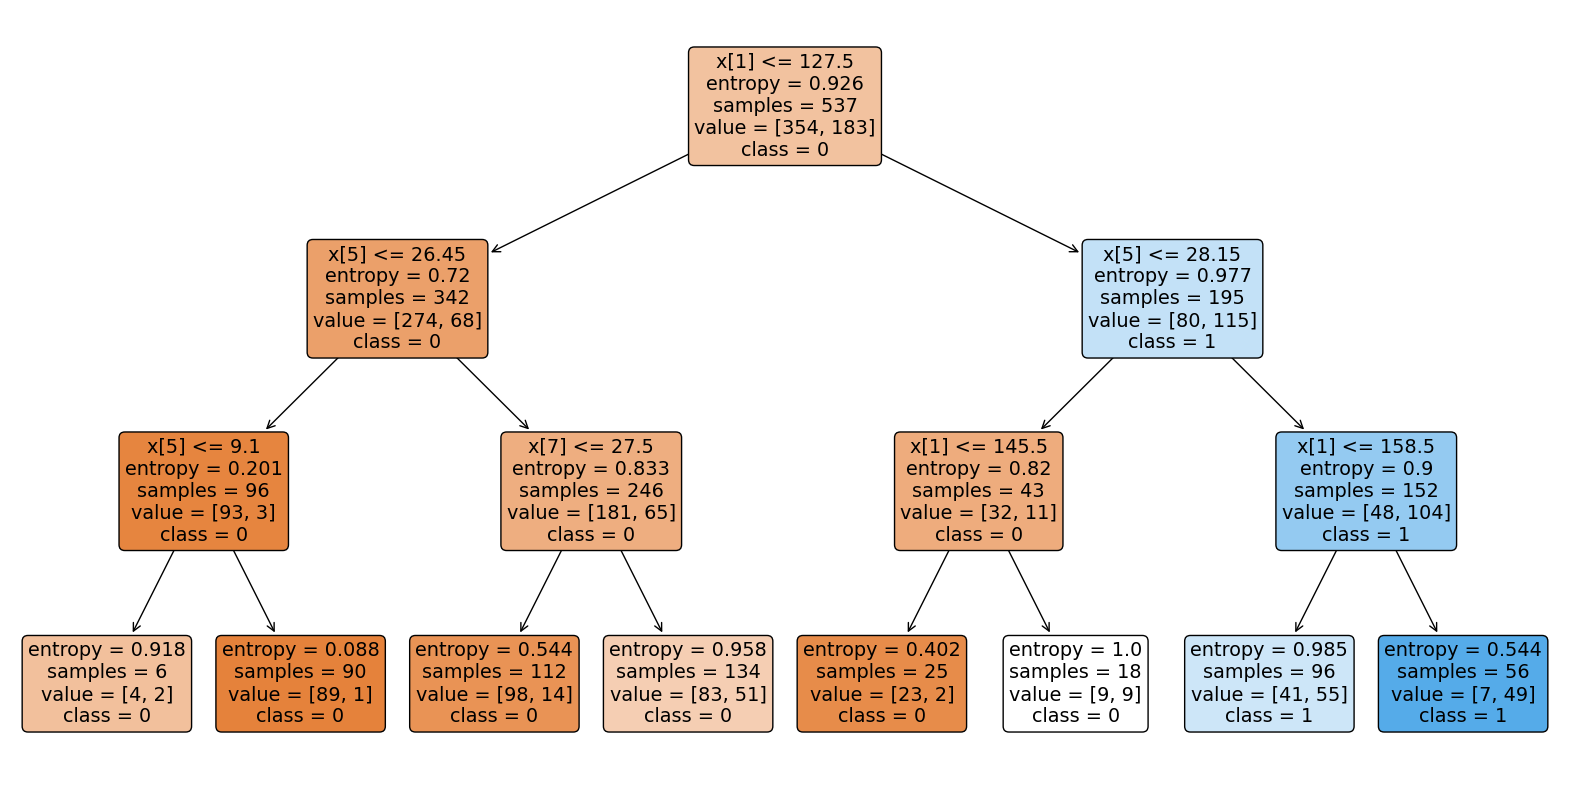

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model,  class_names=['0', '1'], filled=True, rounded=True)
plt.show()

In [ ]:
print("accuracy_score:",accuracy_score(y_test,y_pred))

accuracy_score: 0.7705627705627706
